# Customer Analytics in FMGC Industry (Part 1)

### 1. Introduction

This project is about I customer Analysis in the FMCG industry, based on STP Framework, and marketing modelings. This project is consisted of two parts. The first part of analysis is mainly focusing on "Customer Analytics". In this part, I conducted the customer segmentation, applying various clustering algorthms and also by reducing the dimensionality of the problem. Then in the second part of analysis. I mainly investigate about "Purchase Analytics". <br>
I explorted the descriptive and predictive analysis of the purchase behaviour of customers, including models for purchase incidence, brand choice, purchase quantity to make predictions using real-world data.

### 2. Loading the libraries

In [181]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

sns.set()
plt.rc("font", size=14)
pd.set_option('display.max_column',None)
sns.set(style="whitegrid", color_codes=True)

### 3. Importing Data

In [150]:
demo_df = pd.read_csv('/Users/mac/Desktop/DataScience/Pojects_ds/Customer Analytics FMCG/segmentation data.csv')
demo_df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


### 4. Data Exploration/EDA

In [151]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [152]:
demo_df.shape

(2000, 8)

In [153]:
#checking for any duplicated rows
demo_df['ID'].duplicated().sum()

0

##### > Conclusion
> There are about 2000 customers with 7 demographic features in this dataset. 

> The dataset does not contain any missing values not there is any duplicated values.

> The explanation of each feature is as follows: 
>- Sex (categorical- binary): Biological sex (gender) of a customer,
        0: male 
        1: female

>- Marital status (categorical):	Marital status of a customer, 
        0: single
        1: non-single (divorced / separated / married / widowed)}
		
>- Age	(numerical): 
The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset, 
        18: Min value (the lowest age)
        76: Max value(the highest age)				
>- Education (categorical): Level of education of the customer,						
		0	other / unknown					
		1	high school					
		2	university					
		3	graduate school												
>- Income	(numerical)	Self-reported annual income in US dollars of the customer.					
		35,832	Min value (the lowest income observed in the dataset)					
		309,364	Max value (the highest income observed in the dataset)												
>- Occupation	(categorical)	Category of occupation of the customer.					
		0	unemployed / unskilled					
		1	skilled employee / official					
		2	management / self-employed / highly qualified employee / officer					
>- Settlement size	(categorical)	The size of the city that the customer lives in.					
		0	small city					
		1	mid-sized city					
		2	big city	

In [154]:
demo_df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


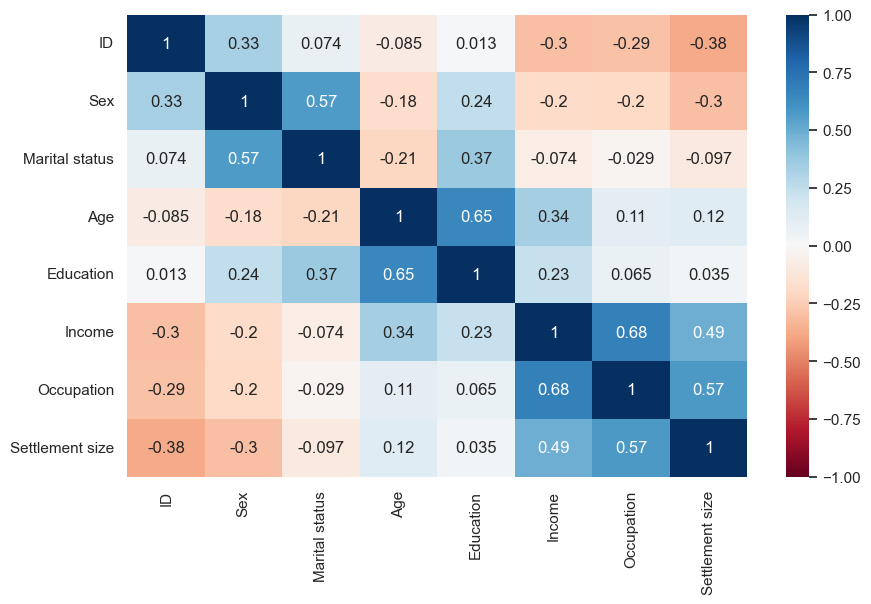

In [155]:
#correlation graph
plt.figure(figsize=(10,6))
sns.heatmap(demo_df.corr(),annot=True,cmap = 'RdBu', vmin = -1, vmax=1)
plt.show()

#### Observation
> There is a strong positive correlation between age and education(r=0.65) and between occupation and income(r=0.68). Some other positive colour value such as the between occupation and settlement size are also observed. These relationships are required for segmentation process.

> Why correlation is required for segmentation ?
>- When we are trying to segment our data, we are doing it on the basis of the common features. Correlation can help you identify which variables are related to each other and how strong that relationship is. For example, if you're trying to segment your customers based on their purchasing behavior, you might want to look at the correlation between different types of products to understand which ones are often bought together. This information can then be used to create targeted marketing campaigns or product bundles that appeal to specific segments of customers.
>- In summary, correlation analysis can provide insights into which variables are most important in creating meaningful segments. It can also help you identify relationships between variables that you may not have considered before, allowing you to create more effective segmentation strategies. 


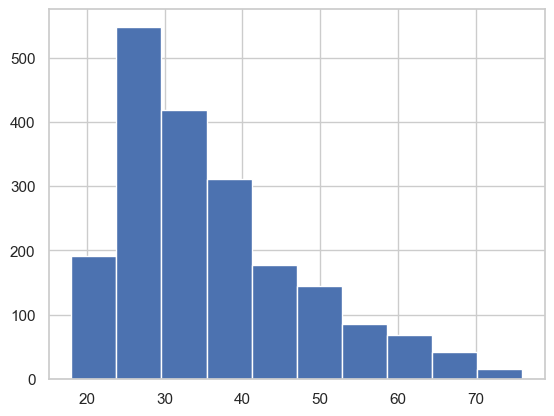

The skewness of the age feature in the dataset is: 1.01


In [156]:
demo_df['Age'].hist()
plt.show()
print('The skewness of the age feature in the dataset is:',round(demo_df['Age'].skew(),2))

- We can see the age column distribution is highly right skewed. We would have to convert it into normal distribution first using many transformation techniques.
- The choice of transformation technique for the age column depends on the distribution of the data and the goal of the analysis. Since we have the age feature which is highly right-skewed, a common transformation to consider is the log transformation. This is because the log transformation can help to reduce the effect of outliers and make the data more symmetric.

In [157]:
#converting the age col from right skewed dist to normal dist
demo_df['age_log'] = np.log(demo_df['Age'])

In [158]:
demo_df['age_log'].skew()

0.4149263147446241

- We can see now that the age col is now a normal distribution.

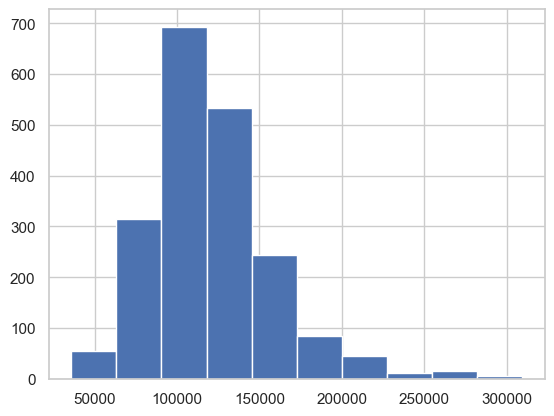

The skewness of the income feature in the dataset is: 1.2


In [159]:
demo_df['Income'].hist()
plt.show()
demo_df['Income'].skew()
print('The skewness of the income feature in the dataset is:',round(demo_df['Income'].skew(),2))

- In simi fashioon we will convert the income col from right skewed to normal dist by doing log transformation.

In [160]:
demo_df['income_log'] = np.log(demo_df['Income'])

In [161]:
demo_df['income_log'].skew()

-0.09929738619793671

- It is now normal dist

- Deleting the cols like Age, Income that not require.

In [162]:
demo_df.drop(['Age','Income','ID'],inplace=True,axis=1)

In [163]:
demo_df.head()

,Sex,Marital status,Education,Occupation,Settlement size,age_log,income_log
0,0,0,2,1,2,4.204693,11.733426
1,1,1,1,1,2,3.091042,11.923531
2,0,0,1,0,0,3.891820,11.398748
3,0,0,1,1,1,3.806662,12.052717
4,0,0,1,1,1,3.970292,11.911910


### 5. Clustering (Customer Anlysis)

- The first step is Standardization, Since clustering is scale sensitve hence we need to do scaling first before we go forth to applying clustering algos.
- Using StandardScaler technique. 
- StandardScaler standardizes the data by centering it around the mean and scaling it to unit variance. It transforms the data so that it has a mean of zero and a standard deviation of one. This technique is useful when the data has a normal distribution, or when you want to normalize the data so that it has a mean of zero and a standard deviation of one, which can be helpful for certain types of analysis.

In [164]:
scaler = StandardScaler()
demo_scaled = scaler.fit_transform(demo_df)

#### Implementing Hierarchial Clustering
- The main purpose of Clustering Algorithms are to group together the data points which have similar features. Simililarity of the data points is determined by the distance between thedm, when the distance is less the similarty is high and vice versa. <br>
- In hierarchical clustering algorithm, the datapoints further down in the tree are grouped together. A joint between 2 clusters is represented by a horizontal line linking 2 vertical lines. <br>
To find clusters based on hierarchical clustering, we need to find a horizontal line in the “Dendrogram” to cut. Under the line, every vertical line will signal the beginning of a cluster, and all the leaves connected to the vertical line until the cut, will belong to a separate cluster.

- The <b> linkage function </b> is used to calculate the linkage matrix, which contains information about how the clusters are formed. The linkage matrix specifies which clusters are merged together at each step of the clustering process, as well as the distance or similarity between those clusters.(ward: Minimizes the variance of the clusters being merged.param)


In [165]:
#this will create a matrix which contains info about how the clusters are created. Info about the distance simi
hier_clust = linkage(demo_scaled,method='ward')

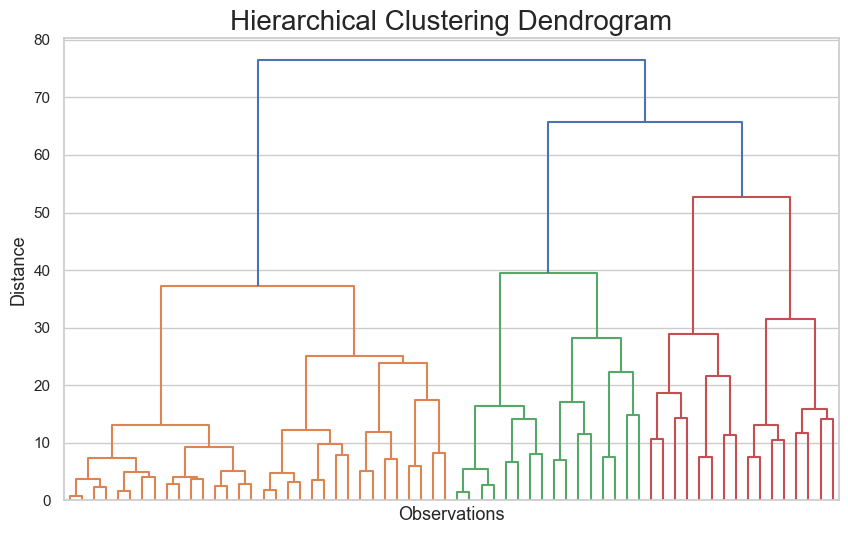

In [166]:
#forming a dengrogram
plt.figure(figsize=(10,6))
plt.title('Hierarchical Clustering Dendrogram', fontsize =20)
plt.ylabel('Distance',  fontsize =13)
plt.xlabel('Observations',  fontsize =13)
dendrogram(hier_clust, show_leaf_counts =False,
           truncate_mode = 'level', 
           p = 5, 
           no_labels = True, )
plt.show()

> Although hierarchical clustering is not very practical, it finds the number of clusters in the data, quickly, when there is no prior knowledge about the number of clusters. This is the major advantage over other methods. For this reason, I performed hierarchical clustering first, to determine optimal number of clusters. 
In practice, we should find the longest vertical line, which is NOT intercepted by a horizontal line from the dendrogram. It seems that 4 clusters are the most appropriate. 

#### Performing K-Means Clustering
-To get the optinal number of clusters we are going to use <b> Elbow Method </b>

In [167]:
wcss = {}
for i in range(1,11):
    kmeans = KMeans(n_clusters= i,  init = 'k-means++', random_state= 42)
    kmeans.fit(demo_scaled)
    wcss[i] = kmeans.inertia_

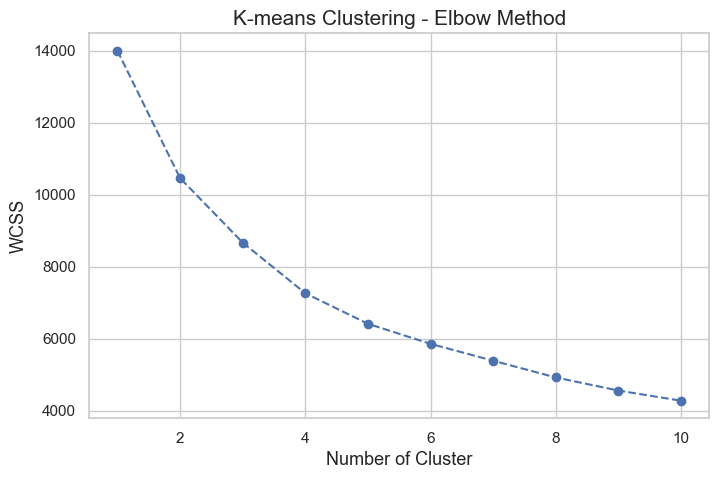

In [168]:
# Elbow method
plt.figure(figsize =(8,5))
plt.plot(list(wcss.keys()), list(wcss.values()),  marker = 'o', linestyle = '--' )

plt.xlabel('Number of Cluster', fontsize = 13)
plt.ylabel('WCSS', fontsize = 13)
plt.title('K-means Clustering - Elbow Method', fontsize = 15)
plt.show()

> This graph shows that when the number of cluster are 4, it is better.

In [169]:
#performing k means
kmeans = KMeans(n_clusters=4, max_iter=500, init='k-means++',random_state=46)

In [170]:
kmeans.fit(demo_scaled)

KMeans(max_iter=500, n_clusters=4, random_state=46)

In [171]:
df_segm_kmeans = demo_df.copy()

In [172]:
df_segm_kmeans['Segment_KMeans'] = kmeans.labels_
df_segm_kmeans['Segment_KMeans'].replace({0: "A", 1: "B", 2: "C", 3:"D"}, inplace=True)

In [173]:
def log_to_normal(log_value):
    ''' This function will convert the log value to its original form'''
    return round(math.exp(log_value),2)


df_segm_analysis = df_segm_kmeans.groupby(['Segment_KMeans']).mean()
df_segm_analysis['age_log_normal'] = df_segm_analysis['age_log'].apply(log_to_normal)
df_segm_analysis['income_log_normal'] = df_segm_analysis['income_log'].apply(log_to_normal)
# Compute the size and proportions of the four clusters
df_segm_analysis['N_Obs'] = df_segm_kmeans[['Segment_KMeans', 'Sex']].groupby(['Segment_KMeans'])['Sex'].count()
df_segm_analysis['Prop_Obs'] = df_segm_analysis.N_Obs / df_segm_analysis.N_Obs.sum()
df_segm_analysis

,Sex,Marital status,Education,Occupation,Settlement size,age_log,income_log,age_log_normal,income_log_normal,N_Obs,Prop_Obs
Segment_KMeans,,,,,,,,,,,
A,0.518657,0.701493,2.126866,1.108209,1.089552,3.995732,11.931931,54.37,152044.82,268,0.1340
B,0.899259,0.985185,1.054815,0.680000,0.447407,3.333107,11.557846,28.03,104594.49,675,0.3375
C,0.022569,0.168403,0.730903,1.262153,1.501736,3.546902,11.831693,34.71,137543.14,576,0.2880
D,0.322245,0.089397,0.775468,0.286902,0.039501,3.537356,11.431655,34.38,92194.40,481,0.2405


> ### <b>Qualitative Analysis of each cluster</b>
> We can analyse the four groups created on the basis of demographic information.
>- <b> Segment A </b> is composed of men and women almost equally with an average age of 54.37, this is the segment that has a bit older people. 70% of them are in a relationship and are hihgly educated/ have high level of education as well as high income(1,52,044). Hence this segment can be named as <b>"Well_Off"</b>
>- <b> Segment B </b> is composed of mostly women with average age of 28 and all are in some relationship/married. They have a medium level of education average income and middle management jobs. This segment is the youngest segment. They seem equally distributed between small mid-sized and big cities. So, they seem average in just about every parameter. We can label this segment as <b>"Standard"</b>
>- <b> Segment C </b> is mostly composed of males, less than 20% are in a relationship, who are only passed out of high school as in they have lower level of education but higher income and occupation. Most of this segment lives in big or middle-sized cities. It appears people in this segment are <b>"Career_Oriented"</b>.
>- <b> Segment D </b> is comprised of male and almost all are single. Their avg age is around 34/35. Their education level is a bit low and hence their salary is low as compared to other segments(under 1000,000). Also, they live almost exclusively in small cities. These people are considered as people in their thirties with a relatively low income living in small cities. This segment of people can be named as **"Fewer_Opportunities"**.


In [174]:
#Renaming the segments
df_segm_analysis.rename({'A':'well_off', 'B': 'fewer_opportunities', 
                         'C': 'career_oriented', 'D': 'standard' }, inplace =True)

In [175]:
df_segm_kmeans['Labels']  = df_segm_kmeans['Segment_KMeans'].map({'A':'well_off', 'B': 'fewer_opportunities', 
                         'C': 'career_oriented', 'D': 'standard' })

In [179]:
df_segm_kmeans['age_log_normal'] = df_segm_kmeans['age_log'].apply(log_to_normal)
df_segm_kmeans['income_log_normal'] = df_segm_kmeans['income_log'].apply(log_to_normal)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


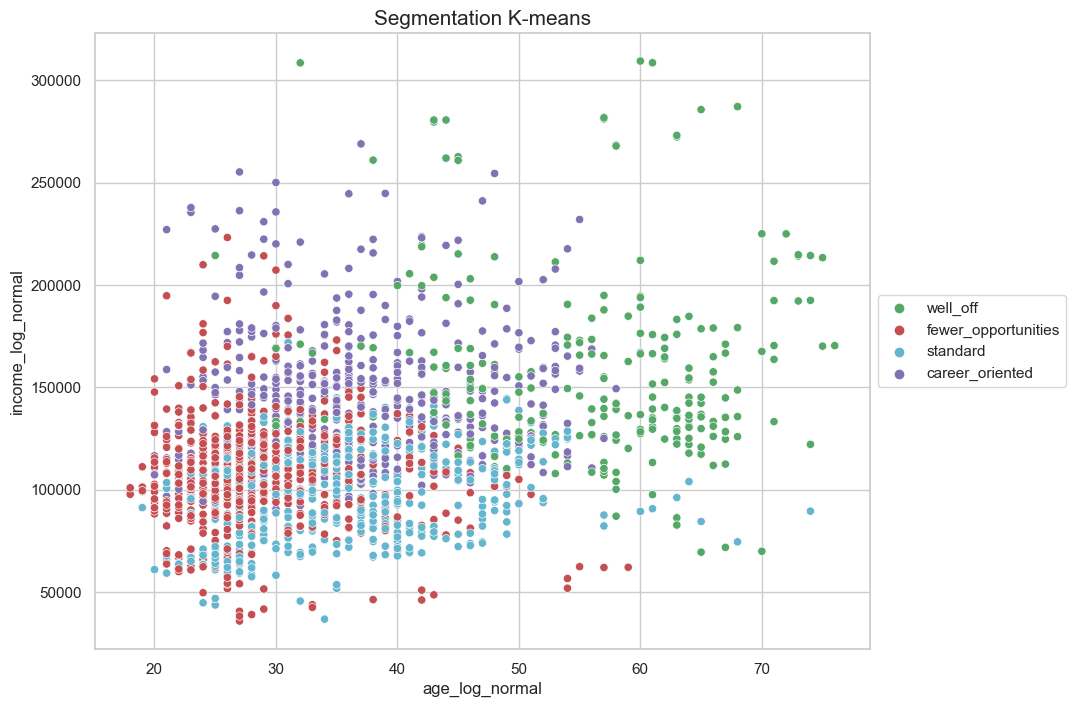

In [180]:
x_axis = df_segm_kmeans['age_log_normal']
y_axis = df_segm_kmeans['income_log_normal']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans.Labels, palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means',fontsize = 15)
plt.legend( bbox_to_anchor = (1, 0.5), loc = 6)
plt.show()

> The green segment well-off is clearly separated as it is highest in both age and income. The other three clusters are overlapped, so it is harder to get more insights just by looking at the plot. To get a clearer result I combined k-means with principal component analysis (PCA).

#### K-Means Clustering based on Principal Component Analysis(PCA)
- PCA is a very popular technique for linear dimentionality reduction. 

In [182]:
pca = PCA()
pca.fit(demo_scaled)

PCA()

In [183]:
#expalined variance proportion of each component
pca.explained_variance_ratio_

array([0.36020324, 0.25810613, 0.19052552, 0.07463262, 0.05720898,
       0.03759067, 0.02173284])

> Components are listed in order of their importance. Importance means that how much of variance of the fitted data is explained by each featue/component. There are about 7 companents, by applying the linear transformation on the data, which in turn created 7 new variables. All 7 component explain 100% variability of the data. The first component explains around 35.7 percent of the whole variability of the data. The second one 26 percent. I visualised the outputs using a cumulative plot as follows.

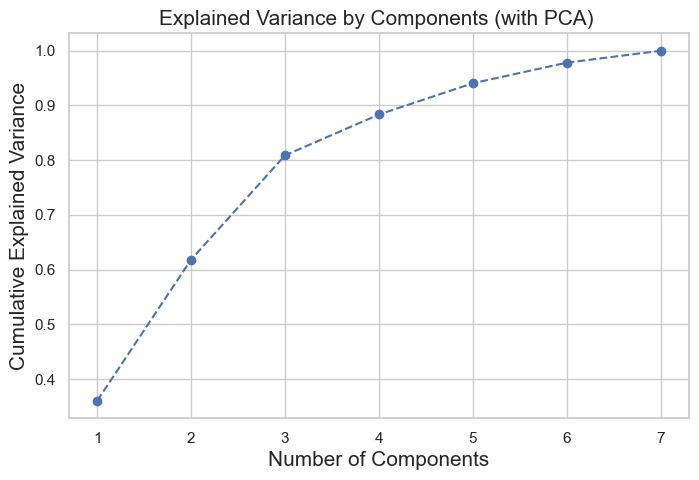

In [185]:
plt.figure(figsize=(8,5))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components (with PCA) ', fontsize= 15)
plt.xlabel('Number of Components', fontsize= 15)
plt.ylabel('Cumulative Explained Variance', fontsize= 15)
plt.show()

> Although we could take all 7 components to earn 100 percent of the information. However, then we cannot take advantages of PCA, which is to reduce the dimensionality of features. Rule of thumb is to keep at least 70 to 80 percent of the explained variance. <b> According to the plot, 3 components will keep almost 80 percent of the initial variability.</b>

In [186]:
pca = PCA(n_components=3)
pca.fit(demo_scaled)

PCA(n_components=3)

In [187]:
pca.components_

array([[-0.32154585, -0.20078014,  0.13992714,  0.49218184,  0.46534957,
         0.32058363,  0.52454641],
       [ 0.46458191,  0.53030326,  0.63651721,  0.04845414, -0.04283905,
         0.26870807,  0.14629057],
       [-0.26228153, -0.40826119,  0.31035576, -0.38540709, -0.2950621 ,
         0.6365701 , -0.16549542]])

> Using PCA, we reduced the initial 7 features to 3 components. This explains the shape the values themselves show the so-called “Loadings”. Loadings are correlation between an original variable and a component. For instance, the first value of the array shows the loading of the first feature on the first component.



In the context of Principal Component Analysis (PCA), the term "component loading" refers to the weights assigned to each variable in the data set for each principal component.

When a data set is transformed using PCA, the resulting principal components are linear combinations of the original variables. The weights assigned to each variable in these linear combinations are the component loadings. The component loadings represent the correlations between the variables and the principal components, and they are used to determine which variables are most strongly associated with each principal component.

The component loadings are often represented as a matrix, where each row corresponds to a principal component and each column corresponds to a variable. The values in the matrix represent the weights assigned to each variable in the linear combination that defines the corresponding principal component.

The component loadings are useful for several purposes, including:

- Identifying the variables that are most strongly associated with each principal component, which can help in interpreting the meaning of the principal components.

- Determining the contribution of each variable to the variance explained by each principal component.

- Selecting a subset of variables to retain when performing dimensionality reduction using PCA.

It's worth noting that the component loadings are not unique, as different rotation methods can produce different sets of loadings that explain the same amount of variance. However, the loadings produced by the most common rotation methods (varimax and promax) are often considered to be the most interpretable. These loadings tell us which variables are most strongly associated with each principal component, and how much each variable contributes to the overall variance explained by the principal component.

Let's say we have a data set of customer purchase information for an online store. The data set has variables such as purchase amount, purchase frequency, time spent on the website, number of items purchased, etc. We want to perform PCA to reduce the dimensionality of the data set and identify the most important patterns or relationships among the variables.

After performing PCA, we obtain several principal components, each of which represents a linear combination of the original variables. For example, the first principal component might be a combination of purchase amount and number of items purchased, while the second principal component might be a combination of purchase frequency and time spent on the website.

The component loadings for each principal component tell us which variables are most strongly associated with that component. For example, if the first principal component has high loadings for purchase amount and number of items purchased, that suggests that those variables are strongly related to each other and are important for explaining the overall variance in the data.

We can use the component loadings to gain insights into the underlying patterns in the data. For example, if the first principal component has high loadings for purchase amount and number of items purchased, we might conclude that customers who spend more tend to buy more items. This could be useful for developing targeted marketing strategies or improving the online shopping experience to encourage customers to make larger purchases.

In [188]:
df_pca_comp = pd.DataFrame(data=pca.components_, columns = demo_df.columns.values,
                           index=['component1','component2','component3'])
df_pca_comp

,Sex,Marital status,Education,Occupation,Settlement size,age_log,income_log
component1,-0.321546,-0.200780,0.139927,0.492182,0.465350,0.320584,0.524546
component2,0.464582,0.530303,0.636517,0.048454,-0.042839,0.268708,0.146291
component3,-0.262282,-0.408261,0.310356,-0.385407,-0.295062,0.636570,-0.165495


> We can see that these values are between [-1,1], since values are basically correlation. If the value is closer to 0, then there is no /lower correlation, i.e lower the loading of a variable into component.

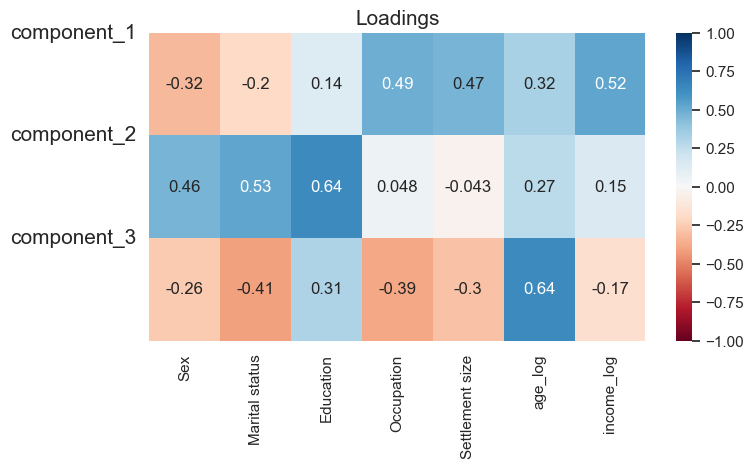

In [190]:
plt.figure(figsize=(8,4))
sns.heatmap(df_pca_comp, vmin = -1, vmax = 1, cmap = 'RdBu', annot = True)
plt.yticks([0,1,2], ['component_1', 'component_2', 'component_3'],rotation = 0, fontsize = 15 )
plt.title('Loadings',  fontsize = 15 )
plt.show()

>- Component 1: There is a positive correlation between component1 and education, occupation, settlement_size, age_log, income_log. These features are strictly related to the career of a person. So,this component seems to show the career focused.
>- Component 2: There is positive correlation between component2 and sex, marital status,education,occupation, age_log,income_log. This one seemsto represent in a good way.
>- Component 3: Age and education seems to be the most important determinants. Marital status and occupation load negatively but are still important, because I determine the importance of the individual loadings with respect to their absolute values. So the three important aspects of the last component can indicate the experienced person has no matter if work experience or life experience.

In [191]:
scores_pca = pca.transform(demo_scaled)
scores_pca

array([[ 2.42435277,  0.64412032,  1.93026791],
       [ 0.30109886,  0.68723458, -2.35345579],
       [-0.62732942, -0.82290323,  2.27185422],
       ...,
       [-1.39591912, -2.30237641,  0.81766373],
       [-2.26288914,  0.58733702, -0.60897991],
       [-2.02147485, -2.60307828,  0.49562213]])

> After transforming the data, the result is a new array where each observation is described by the 3 components. That is why there are only 3 columns one for each of the new features. These new values are called PCA scores.

#### K Means with PCA

In [193]:
wcss_pca={}
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss_pca[i] = kmeans_pca.inertia_

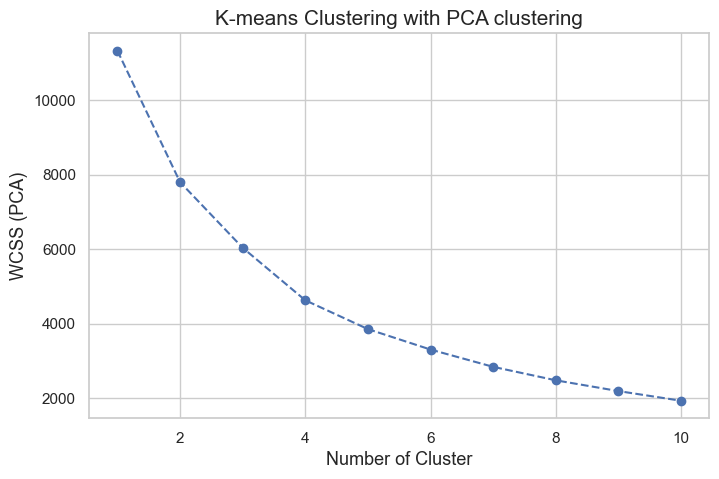

In [195]:
# Elbow method
plt.figure(figsize =(8,5))
plt.plot(list(wcss_pca.keys()), list(wcss_pca.values()),  marker = 'o', linestyle = '--' )

plt.xlabel('Number of Cluster', fontsize = 13)
plt.ylabel('WCSS (PCA)', fontsize = 13)
plt.title('K-means Clustering with PCA clustering', fontsize = 15)
plt.show()

- The optimal number of clusters are: 4

In [197]:
'''x, y = list(wcss_pca.keys()), list(wcss_pca.values())
kn = KneeLocator(x, y, curve='convex', direction='decreasing')
print('The optimal number of clusters, suggested by Elbow criterion: ', kn.knee)'''

"x, y = list(wcss_pca.keys()), list(wcss_pca.values())\nkn = KneeLocator(x, y, curve='convex', direction='decreasing')\nprint('The optimal number of clusters, suggested by Elbow criterion: ', kn.knee)"

In [212]:
kmeans_pca = KMeans(n_clusters=4,init='k-means++',random_state=4)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=4)

In [213]:
df_seg_pca_kmeans = pd.concat([demo_df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis =1)
df_seg_pca_kmeans.columns.values[-3:] =  ['component_1', 'component_2', 'component_3']
df_seg_pca_kmeans['Segment_KMeans_PCA'] = kmeans_pca.labels_
df_seg_pca_kmeans['Segment_KMeans_PCA'].replace({0: "W", 1: "X", 2: "Y", 3:"Z"}, inplace=True)
df_seg_pca_kmeans.head()

,Sex,Marital status,Education,Occupation,Settlement size,age_log,income_log,component_1,component_2,component_3,Segment_KMeans_PCA
0,0,0,2,1,2,4.204693,11.733426,2.424353,0.644120,1.930268,Y
1,1,1,1,1,2,3.091042,11.923531,0.301099,0.687235,-2.353456,Z
2,0,0,1,0,0,3.891820,11.398748,-0.627329,-0.822903,2.271854,X
3,0,0,1,1,1,3.806662,12.052717,1.747518,-0.562167,0.774020,W
4,0,0,1,1,1,3.970292,11.911910,1.677973,-0.485534,1.191059,W


In [214]:
def log_to_normal(log_value):
    ''' This function will convert the log value to its original form'''
    return round(math.exp(log_value),2)


df_segm_analysis_pca = df_seg_pca_kmeans.groupby(['Segment_KMeans_PCA']).mean()
df_segm_analysis_pca['age_log_normal'] = df_segm_analysis_pca['age_log'].apply(log_to_normal)
df_segm_analysis_pca['income_log_normal'] = df_segm_analysis_pca['income_log'].apply(log_to_normal)
# Compute the size and proportions of the four clusters
df_segm_analysis_pca['N_Obs'] = df_seg_pca_kmeans[['Segment_KMeans_PCA', 'Sex']].groupby(['Segment_KMeans_PCA'])['Sex'].count()
df_segm_analysis_pca['Prop_Obs'] = df_segm_analysis_pca.N_Obs / df_segm_analysis_pca.N_Obs.sum()
df_segm_analysis_pca

,Sex,Marital status,Education,Occupation,Settlement size,age_log,income_log,component_1,component_2,component_3,age_log_normal,income_log_normal,N_Obs,Prop_Obs
Segment_KMeans_PCA,,,,,,,,,,,,,,
W,0.003263,0.057096,0.690049,1.200653,1.259380,3.574956,11.814264,1.301773,-1.143755,-0.003965,35.69,135166.75,613,0.3065
X,0.598921,0.419065,0.881295,0.075540,0.008993,3.464279,11.337922,-1.699347,-0.345699,0.646104,31.95,83945.38,556,0.2780
Y,0.547297,0.702703,2.121622,0.996622,0.976351,3.986386,11.892428,1.271613,1.966652,0.964333,53.86,146155.77,296,0.1480
Z,0.779439,0.966355,1.000000,1.024299,0.770093,3.303981,11.676257,-0.429060,0.581685,-1.200459,27.22,117742.65,535,0.2675


> Qualitative Analysis
>- <b> Segment W </b> has a lot of male, most of them are single having average age of about 35. They are less educated only completed high school, but are highly skilled with comparatively good income. Naming <b>Career Oriented </b> 
>- <b> Segment X </b> has equal amount of male and female. And almost half of them are married. With less degree and are unemployed and unskilled with low lifestyle value having least income.These people are in their early 30s. Named <b> Fewer Opportunities </b>
>- <b> Segment Y </b> too has equal amount of male and female. Most of them are married. They are quite older people have avg age as 53. They have very high education levels who are highly skilled with maxium income levels. Named as <b> Well offs </b>
>- <b> Segment Z </b> has more females mostlyare married having avg age of 27. They have got good education and are highly skilled they have middle income levels. Named as <b> Standard </b>

In [216]:
df_segm_analysis_pca.rename({'Y':'well-off', 'X': 'fewer-opportunities', 
                        'Z': 'standard', 'W': 'career_focused'}, inplace =True)

df_segm_analysis_pca

,Sex,Marital status,Education,Occupation,Settlement size,age_log,income_log,component_1,component_2,component_3,age_log_normal,income_log_normal,N_Obs,Prop_Obs
Segment_KMeans_PCA,,,,,,,,,,,,,,
career_focused,0.003263,0.057096,0.690049,1.200653,1.259380,3.574956,11.814264,1.301773,-1.143755,-0.003965,35.69,135166.75,613,0.3065
fewer-opportunities,0.598921,0.419065,0.881295,0.075540,0.008993,3.464279,11.337922,-1.699347,-0.345699,0.646104,31.95,83945.38,556,0.2780
well-off,0.547297,0.702703,2.121622,0.996622,0.976351,3.986386,11.892428,1.271613,1.966652,0.964333,53.86,146155.77,296,0.1480
standard,0.779439,0.966355,1.000000,1.024299,0.770093,3.303981,11.676257,-0.429060,0.581685,-1.200459,27.22,117742.65,535,0.2675


In [217]:
df_seg_pca_kmeans['Legend'] = df_seg_pca_kmeans['Segment_KMeans_PCA'].map({'Y':'well-off', 'X': 'fewer-opportunities', 
                        'Z': 'standard', 'W': 'career_focused'})

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


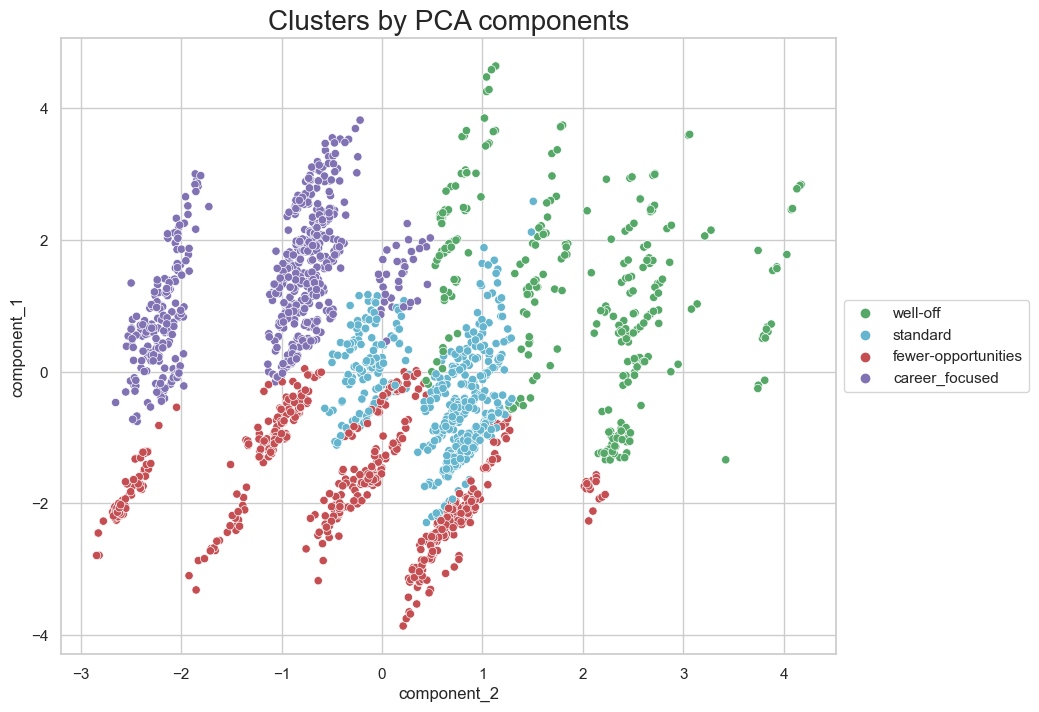

In [218]:
x_axis = df_seg_pca_kmeans['component_2']
y_axis = df_seg_pca_kmeans['component_1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_seg_pca_kmeans['Legend'], palette =  ['g', 'c', 'r', 'm'] )
plt.title('Clusters by PCA components', fontsize =20)
plt.legend( bbox_to_anchor = (1, 0.5), loc = 6)
plt.show()

>**Findings:** Now we clearly see the separate clusters.
Previously, when we plotted the K-Means clustering solution without PCA, we could only distinguish the green segment. However now, the division based on the components is much more pronounced. This is one of the largest advantages of using PCA, reducing the number of variables by combining them into bigger more meaningful features.<br><br> 
Note that using PCA technique means the features are orthogonal to each other, which means that the difference between components is as big as possible. Still, we can see some overlap between the red and blue segment. However overall, all 4 segments are pretty much clearly separated the spots.

In [208]:
import pickle

#scaler
pickle.dump(scaler,open('scaler.pickle','wb'))

#pca
pickle.dump(pca,open('pca.pickle','wb'))

#kmeansPCA
pickle.dump(kmeans_pca, open('kmeans_pca.pickle','wb'))

> Note: These exported objects will be used for preprocessing in the second part of analysis: Purchase Analytics.